In [1]:
import numpy as np#导入数组与矩阵运算库
import pandas as pd #导入数据处理库 
import matplotlib.pyplot as plt#导入画图方法

#调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在python console里面生成图像。
%matplotlib inline

import seaborn as sns#基于matplotlib的图形可视化python包 生成图像用的
from pylab import mpl#python自带的画图功能

##在画的图片中显示中文标签 
from matplotlib import font_manager as fm, rcParams
import matplotlib as pltt
pltt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
pltt.rcParams['axes.unicode_minus']=False   #这两行需要手动设置

#sklearn是基于 Python 语言的机器学习工具:简单高效的数据挖掘和数据分析工具
from sklearn.ensemble import RandomForestClassifier#随机森林分类
from sklearn.model_selection import KFold#交叉验证函数
#from sklearn.cross_validation import KFold

In [2]:
# import data
filename= "D:/filp/program/kobel/data.csv"
raw = pd.read_csv(filename)#导入未经加工的原始数据
print (raw.shape)#查看数据大小

(30697, 25)


In [3]:
print(raw.head())
# action_type 进攻方式（更具体）
# combined_shot_type 进攻方式
# game_event_id 比赛事件id
# game_id 比赛ID
# lat 投篮经度
# loc_x 投篮x坐标
# loc_y 投篮y坐标
# lon 投篮纬度
# minutes_remaining 单节剩余时间（分钟）
# period 表示第几节
# playoffs 是否是季后赛
# season 赛季
# seconds_remaining 剩余时间（秒）
# shot_distance 投篮距离
# shot_made_flag 是否进球
# shot_type 两分球或三分球
# shot_zone_area 投篮区域
# shot_zone_basic 投篮区域（更具体）
# shot_zone_range 投篮范围
# team_id 球队ID
# team_name 球队名称
# game_date 比赛日期
# matchup 比赛双方
# opponent 对手
# shot_id 投篮ID

         action_type combined_shot_type  game_event_id   game_id      lat  \
0          Jump Shot          Jump Shot             10  20000012  33.9723   
1          Jump Shot          Jump Shot             12  20000012  34.0443   
2          Jump Shot          Jump Shot             35  20000012  33.9093   
3          Jump Shot          Jump Shot             43  20000012  33.8693   
4  Driving Dunk Shot               Dunk            155  20000012  34.0443   

   loc_x  loc_y       lon  minutes_remaining  period  ...       shot_type  \
0    167     72 -118.1028                 10       1  ...  2PT Field Goal   
1   -157      0 -118.4268                 10       1  ...  2PT Field Goal   
2   -101    135 -118.3708                  7       1  ...  2PT Field Goal   
3    138    175 -118.1318                  6       1  ...  2PT Field Goal   
4      0      0 -118.2698                  6       2  ...  2PT Field Goal   

          shot_zone_area  shot_zone_basic  shot_zone_range     team_id  \


In [4]:
# pro_data =  raw[pd.notnull(raw['shot_made_flag'])]#去除数据为空的项
pro_data = raw[raw['shot_made_flag'].notnull()]

Text(0.5, 1.0, 'lat and lon')

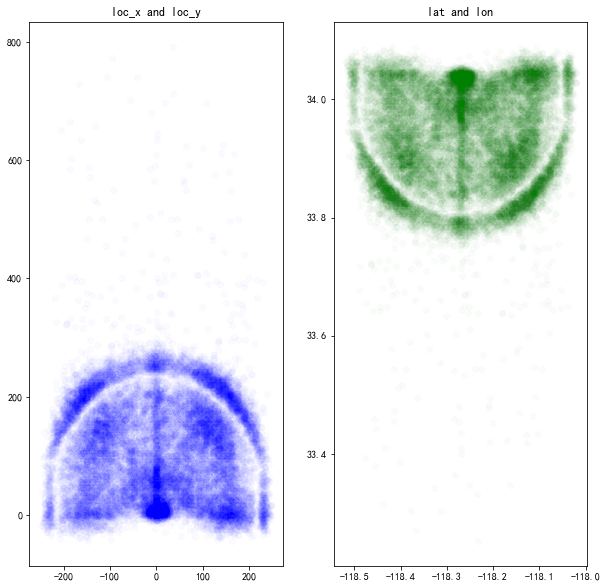

In [5]:
#查看 loc_x and loc_y，# lat and lon的关系
alpha = 0.02
plt.figure(figsize=(10,10))

# loc_x and loc_y
plt.subplot(121)
plt.scatter(pro_data.loc_x, pro_data.loc_y, color='blue', alpha=alpha)
plt.title('loc_x and loc_y')

# lat and lon
plt.subplot(122)
plt.scatter(pro_data.lon, pro_data.lat, color='green', alpha=alpha)
plt.title('lat and lon')

Text(0.5, 1.0, 'shot_zone_range')

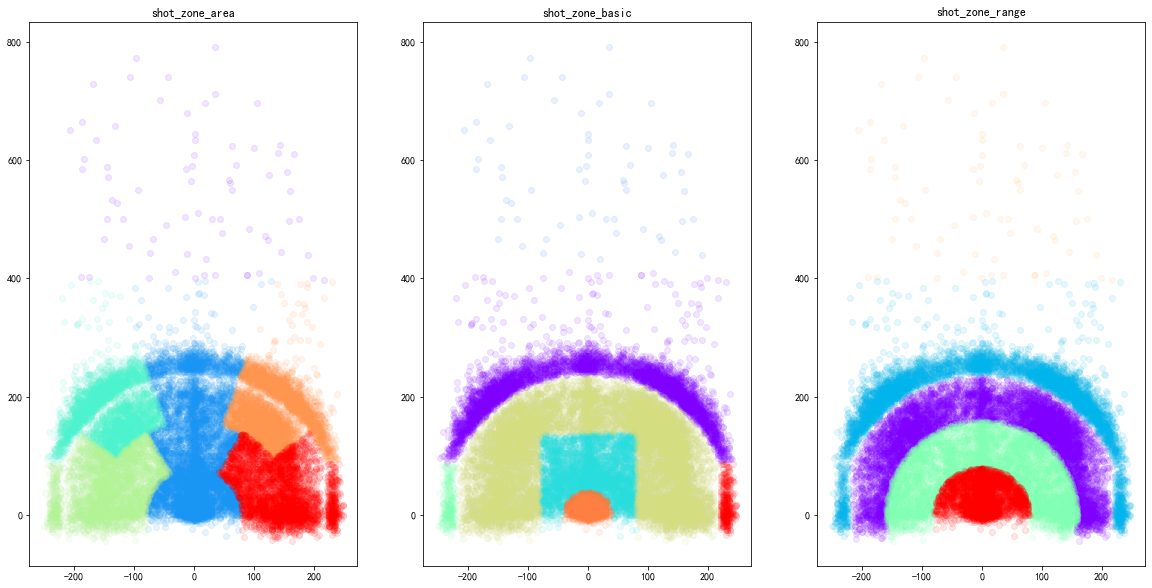

In [6]:
import matplotlib.cm as cm
plt.figure(figsize=(20,10))

def scatter_plot_by_category(feat):
    alpha = 0.1
    gs = pro_data.groupby(feat)
    cs = cm.rainbow(np.linspace(0, 1, len(gs)))
    for g, c in zip(gs, cs):
        plt.scatter(g[1].loc_x, g[1].loc_y, color=c, alpha=alpha)

# shot_zone_area
plt.subplot(131)
scatter_plot_by_category('shot_zone_area')
plt.title('shot_zone_area')

# shot_zone_basic
plt.subplot(132)
scatter_plot_by_category('shot_zone_basic')
plt.title('shot_zone_basic')

# shot_zone_range
plt.subplot(133)
scatter_plot_by_category('shot_zone_range')
plt.title('shot_zone_range')

In [7]:
##显示中文标签 
pltt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
pltt.rcParams['axes.unicode_minus']=False   #这两行需要手动设置

Text(0.5, 1.0, '投篮位置')

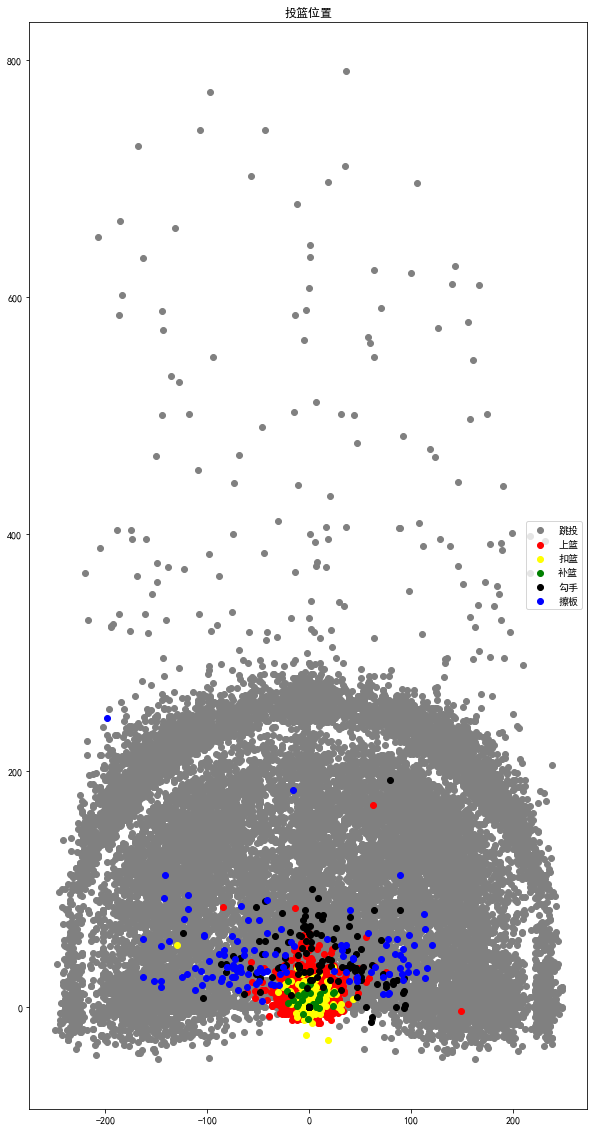

In [8]:
plt.figure(figsize=(10,20))
jumpshot = pro_data[pro_data['combined_shot_type']=='Jump Shot']
layup = pro_data[pro_data['combined_shot_type']=='Layup']
dunk = pro_data[pro_data['combined_shot_type']=='Dunk']
tipshot = pro_data[pro_data['combined_shot_type']=='Tip Shot']
hookshot = pro_data[pro_data['combined_shot_type']=='Hook Shot']
bankshot = pro_data[pro_data['combined_shot_type']=='Bank Shot']

plt.scatter(jumpshot.loc_x, jumpshot.loc_y, color='grey')
plt.scatter(layup.loc_x, layup.loc_y, color='red')
plt.scatter(dunk.loc_x, dunk.loc_y, color='yellow' )
plt.scatter(tipshot.loc_x, tipshot.loc_y, color='green')
plt.scatter(hookshot.loc_x, hookshot.loc_y, color='black')
plt.scatter(bankshot.loc_x, bankshot.loc_y, color='blue')
label=['跳投','上篮','扣篮','补篮','勾手','擦板']
plt.legend(label,loc=7)
plt.title('投篮位置')

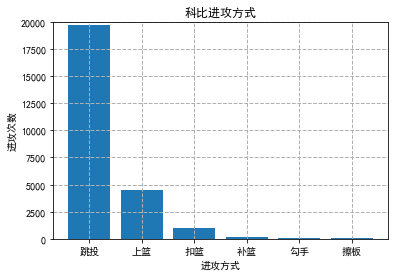

In [9]:
attack_method = pro_data['combined_shot_type'].value_counts()
a = np.array([1,2,3,4,5,6])
plt.bar(a,attack_method,align = 'center')
plt.xlabel('进攻方式')
plt.ylabel('进攻次数')
plt.title('科比进攻方式')
plt.grid(linestyle = '--',linewidth = 1)
plt.ylim(0,20000)
plt.xticks(a,('跳投','上篮','扣篮','补篮','勾手','擦板'))
plt.show()

In [10]:
#科比的出手方式的次数，很明显跳投最多

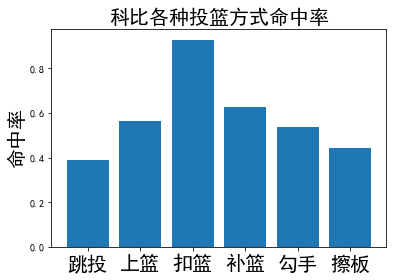

In [11]:
shooting = pro_data[pro_data['shot_made_flag']==1]['combined_shot_type'].value_counts()
list1 = attack_method.tolist()
list2 = shooting.tolist()
list3 = attack_method.tolist()
for i in range(len(list1)):
    list3[i]=list2[i]/list1[i]
hits_df=pd.Series(list3);
a = np.array([1,2,3,4,5,6])
plt.bar(a,hits_df,align = 'center')
plt.ylabel('命中率',fontsize=20)
plt.title('科比各种投篮方式命中率',fontsize=20)
plt.xticks(a,('跳投','上篮','扣篮','补篮','勾手','擦板'),fontsize=20)
plt.show()

In [12]:
#投篮命中率上，扣篮无疑是命中率最高的

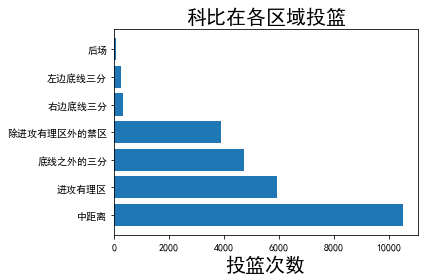

In [13]:
area = pro_data['shot_zone_basic'].value_counts()
b = np.array([0,1,2,3,4,5,6])
plt.barh(b,area,align ='center')
plt.yticks(b,('中距离','进攻有理区','底线之外的三分','除进攻有理区外的禁区','右边底线三分','左边底线三分','后场'))
plt.xlabel('投篮次数',fontsize=20)
plt.title('科比在各区域投篮',fontsize=20)
plt.tight_layout()# 紧凑显示图片，居中显示
plt.show()

In [14]:
#从投篮距离上看，科比大多数是在中距离出手

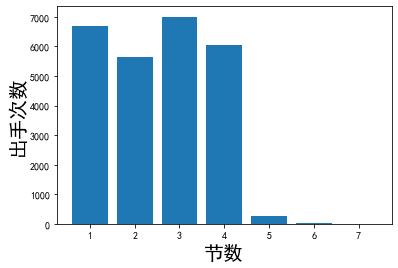

In [15]:
shot_number = pro_data['period'].value_counts().sort_index()
shot_hit = pro_data[pro_data['shot_made_flag']==1]['period'].value_counts().sort_index()
plt.bar(shot_number.index,shot_number,align='center')
plt.ylabel('出手次数',fontsize=20)
plt.xlabel('节数',fontsize=20)
plt.show()

In [16]:
#科比在每一节的出手次数，其中第三节最多，第一节次之，因为5,6,7节都是加时赛，自然少很多

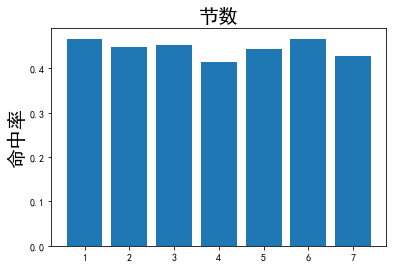

In [17]:
list1 = shot_number.tolist()
list2 = shot_hit.tolist()
for i in range(len(list1)):
    list2[i]=list2[i]/list1[i]
shot_hit=pd.Series(list2)
c = np.array([1,2,3,4,5,6,7])
plt.bar(c,shot_hit,align = 'center')
plt.ylabel('命中率',fontsize=20)
plt.title('节数',fontsize=20)
plt.xticks(c)
plt.show()

In [18]:
#每一节投篮命中率 可以看出科比的投篮命中率在第四节最低，可以见得体力对科比投篮命中率也是有些影响的

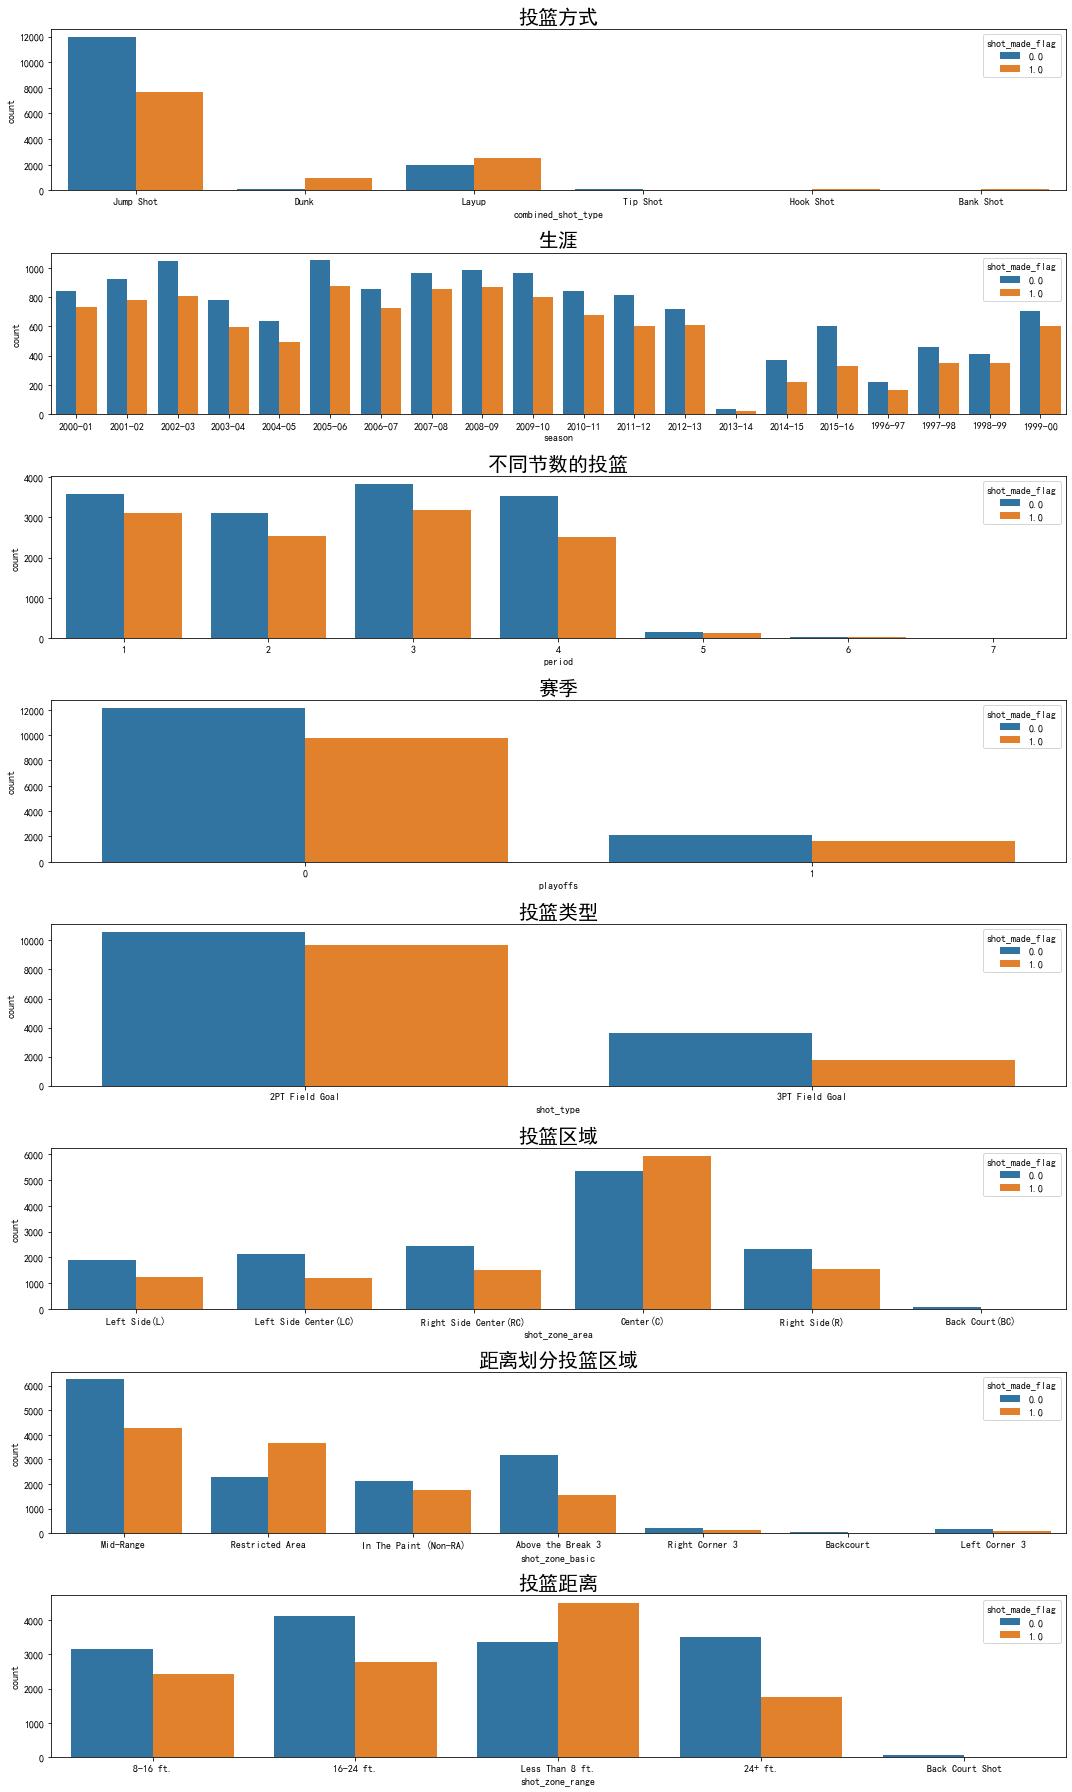

In [19]:
f, axarr = plt.subplots(8, figsize=(15, 25))

sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=pro_data, ax=axarr[0])
sns.countplot(x="season", hue="shot_made_flag", data=pro_data, ax=axarr[1])
sns.countplot(x="period", hue="shot_made_flag", data=pro_data, ax=axarr[2])
sns.countplot(x="playoffs", hue="shot_made_flag", data=pro_data, ax=axarr[3])
sns.countplot(x="shot_type", hue="shot_made_flag", data=pro_data, ax=axarr[4])
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=pro_data, ax=axarr[5])
sns.countplot(x="shot_zone_basic", hue="shot_made_flag", data=pro_data, ax=axarr[6])
sns.countplot(x="shot_zone_range", hue="shot_made_flag", data=pro_data, ax=axarr[7])

axarr[0].set_title('投篮方式',fontsize=20)
axarr[1].set_title('生涯',fontsize=20)
axarr[2].set_title('不同节数的投篮',fontsize=20)
axarr[3].set_title('赛季',fontsize=20)
axarr[4].set_title('投篮类型',fontsize=20)
axarr[5].set_title('投篮区域',fontsize=20)
axarr[6].set_title('距离划分投篮区域',fontsize=20)
axarr[7].set_title('投篮距离',fontsize=20)

plt.tight_layout()
plt.show()

#0.0为投丢 1.0为投中

In [20]:
#极坐标,极坐标（角度和距离）可以成为一个标准的特征
#算距离
raw['dist'] = np.sqrt(raw['loc_x']**2 + raw['loc_y']**2)
#算角度
loc_x_zero = raw['loc_x'] == 0
#print (loc_x_zero)
raw['angle'] = np.array([0]*len(raw))
raw['angle'][~loc_x_zero] = np.arctan(raw['loc_y'][~loc_x_zero] / raw['loc_x'][~loc_x_zero])
raw['angle'][loc_x_zero] = np.pi / 2 
#合并成一个新特征，剩余时间=剩余min+剩余s
raw['remaining_time']=raw['minutes_remaining']*60+raw['seconds_remaining']
print(pro_data.action_type.unique()) #该列的不重复的值
print(pro_data.combined_shot_type.unique())
print(pro_data.shot_type.unique())
 
print(pro_data.shot_type.value_counts())#该列各种不重复值出现的次数

['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Reverse Dunk Shot' 'Slam Dunk Shot' 'Driving Layup Shot'
 'Turnaround Jump Shot' 'Reverse Layup Shot' 'Tip Shot'
 'Running Hook Shot' 'Alley Oop Dunk Shot' 'Dunk Shot'
 'Alley Oop Layup shot' 'Running Dunk Shot' 'Driving Finger Roll Shot'
 'Running Layup Shot' 'Finger Roll Shot' 'Fadeaway Jump Shot'
 'Follow Up Dunk Shot' 'Hook Shot' 'Turnaround Hook Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Tip Shot'
 'Running Reverse Layup Shot' 'Driving Finger Roll Layup Shot'
 'Fadeaway Bank shot' 'Pullup Jump shot' 'Finger Roll Layup Shot'
 'Turnaround Fadeaway shot' 'Driving Reverse Layup Shot'
 'Driving Slam Dunk Shot' 'Step Back Jump shot' 'Turnaround Bank shot'
 'Reverse Slam Dunk Shot' 'Floating Jump shot' 'Putback Slam Dunk Shot'
 'Running Bank shot' 'Driving Bank shot' 'Driving Jump shot'
 'Putback Layup Shot' 'Putback Dun

D:\filp\filp00\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\filp\filp00\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [21]:
#不重复的赛季
pro_data['season'].unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [11]:
#把年份去掉
#split从‘-’分割成两列，把[1]列取出来通过apply函数赋值给raw['season']
raw['season']=raw['season'].apply(lambda x:int(x.split('-')[1]))
raw['season'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 97,
       98, 99,  0], dtype=int64)

In [12]:
print(pro_data['team_id'].unique())
print(pro_data['team_name'].unique())

[1610612747]
['Los Angeles Lakers']


In [13]:
pd.DataFrame({'matchup':pro_data.matchup,'opponet':pro_data.opponent})

,matchup,opponet
1,LAL @ POR,POR
2,LAL @ POR,POR
3,LAL @ POR,POR
4,LAL @ POR,POR
5,LAL @ POR,POR
...,...,...
30691,LAL vs. IND,IND
30692,LAL vs. IND,IND
30694,LAL vs. IND,IND
30695,LAL vs. IND,IND


In [14]:
gs=pro_data.groupby('shot_zone_area')
print(pro_data['shot_zone_area'].value_counts())
print(len(gs))

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64
6


In [15]:
drops = ['shot_id', 'team_id', 'team_name', 'shot_zone_area', 'shot_zone_range', \
'shot_zone_basic',  'matchup', 'lon', 'lat', 'seconds_remaining', 'minutes_remaining', \
         'shot_distance', 'loc_x', 'loc_y', 'game_event_id', 'game_id', 'game_date']
#把不要的特征依次去掉
for drop in drops:
    raw=raw.drop(drop,1)#1表示一列
raw.head()

,action_type,combined_shot_type,period,playoffs,season,shot_made_flag,shot_type,opponent,dist,angle,remaining_time
0,Jump Shot,Jump Shot,1,0,1,NaN,2PT Field Goal,POR,181.859836,0.407058,627
1,Jump Shot,Jump Shot,1,0,1,0.0,2PT Field Goal,POR,157.000000,-0.000000,622
2,Jump Shot,Jump Shot,1,0,1,1.0,2PT Field Goal,POR,168.600119,-0.928481,465
3,Jump Shot,Jump Shot,1,0,1,0.0,2PT Field Goal,POR,222.865430,0.903063,412
4,Driving Dunk Shot,Dunk,2,0,1,1.0,2PT Field Goal,POR,0.000000,1.570796,379


In [16]:
#特征one-hot编码
print(raw['combined_shot_type'].value_counts())
pd.get_dummies(raw['combined_shot_type'],prefix='combined_shot_type')[0:3]
#get_dummies把字符串变成机器能够识别的数字列表，prefix：前缀；[0,3]打印前3行

Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: combined_shot_type, dtype: int64


,combined_shot_type_Bank Shot,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,combined_shot_type_Layup,combined_shot_type_Tip Shot
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0


In [17]:
categorical_vars=['action_type','combined_shot_type','shot_type',\
                 'opponent','period','season']
#按照上述方法把数字列表拼接到raw中
for var in categorical_vars:
    raw=pd.concat([raw,pd.get_dummies(raw[var],prefix=var)],1)
    #1表示按列连接，0表示按样本连接
    raw=raw.drop(var,1)
    #从raw中去掉var特征列
raw.head()

,playoffs,shot_made_flag,dist,angle,remaining_time,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Cutting Finger Roll Layup Shot,action_type_Cutting Layup Shot,action_type_Driving Bank shot,...,season_10,season_11,season_12,season_13,season_14,season_15,season_16,season_97,season_98,season_99
0,0,NaN,181.859836,0.407058,627,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,157.000000,-0.000000,622,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1.0,168.600119,-0.928481,465,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,222.865430,0.903063,412,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1.0,0.000000,1.570796,379,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
train_kobe=raw[pd.notnull(raw['shot_made_flag'])]
train_label=train_kobe['shot_made_flag']
train_kobe=train_kobe.drop('shot_made_flag',1)
test_kobe=raw[pd.isnull(raw['shot_made_flag'])]
test_kobe=test_kobe.drop('shot_made_flag',1)

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,log_loss
import time
import numpy as np
 
print('Finding best n_estimators for RandomForestClassifier...')
min_score=100000
best_n=0
scores_n=[]
range_n=np.logspace(0,2,num=3).astype(int)
for n in range_n:
    print('the number of trees:{0}'.format(n))
    t1=time.time()
    rfc_score=0.
    rfc=RandomForestClassifier(n_estimators=n)
    kf=KFold(n_splits=10,shuffle=True)
    for train_k,test_k in kf.split(train_kobe):    
        #print(test_k)
        #train_k,test_k是索引数组
        rfc.fit(train_kobe.iloc[train_k],train_label.iloc[train_k])
        pred=rfc.predict(train_kobe.iloc[test_k])
        rfc_score+=log_loss(train_label.iloc[test_k],pred)/10
    scores_n.append(rfc_score)
    if rfc_score<min_score:
        min_score=rfc_score
        best_n=n
    t2=time.time()
    print('Done processing {0} trees ({1:.3f}sec)'.format(n,t2-t1))
print(best_n,min_score)

Finding best n_estimators for RandomForestClassifier...
the number of trees:1
Done processing 1 trees (0.848sec)
the number of trees:10
Done processing 10 trees (4.672sec)
the number of trees:100
Done processing 100 trees (45.817sec)
100 11.88985332320646


In [20]:
#find best max_depth for RandomForestClassifier
print('Finding best max_depth for RandomForestClassifier...')
min_score=100000
best_m=0
scores_m=[]
range_m=np.logspace(0,2,num=3).astype(int)
for m in range_m:
    print('the max depth : {0}'.format(m))
    t1=time.time()
    
    rfc_score=0.
    rfc=RandomForestClassifier(max_depth=m,n_estimators=best_n)
    kf=KFold(10,shuffle=True)
    for train_k,test_k in kf.split(train_kobe):
        rfc.fit(train_kobe.iloc[train_k],train_label.iloc[train_k])
        pred=rfc.predict(train_kobe.iloc[test_k])
        rfc_score+=log_loss(train_label.iloc[test_k],pred)/10
    scores_m.append(rfc_score)
    if rfc_score<min_score:
        min_score=rfc_score
        best_m=m
    t2=time.time()
    print('Done processing {0} trees ({1:.3f}sec)'.format(m,t2-t1))
print(best_m,min_score)

Finding best max_depth for RandomForestClassifier...
the max depth : 1
Done processing 1 trees (3.680sec)
the max depth : 10
Done processing 10 trees (14.257sec)
the max depth : 100
Done processing 100 trees (41.879sec)
10 11.030934989825795


Text(0.5, 0, 'max depth')

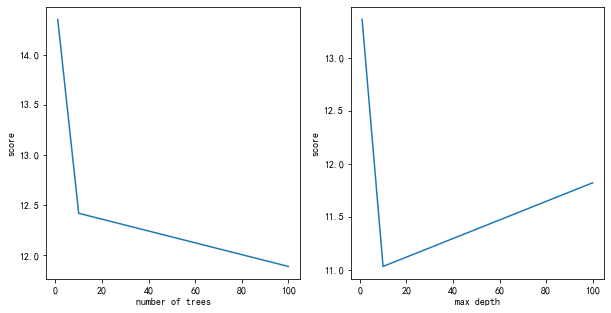

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(range_n,scores_n)
plt.ylabel('score')
plt.xlabel('number of trees')
 
plt.subplot(122)
plt.plot(range_m,scores_m)
plt.ylabel('score')
plt.xlabel('max depth')

In [ ]:
#使用训练数据训练模型
model = RandomForestClassifier(n_estimators=best_n, max_depth=best_m)
model.fit(train, train_y)
pred = model.predict_proba(submission)

In [ ]:
#根据需要生成符合标准的提交数据
sub = pd.read_csv("../input/sample_submission.csv")
sub['shot_made_flag'] = pred
sub.to_csv("real_submission.csv", index=False)